# Analise exploratoria

Vamos começar nosso dia com o desafio de prever o preço de uma casa. Para isso vamos usar dados de uma cidade americana, e criar um modelo para achar esse valor.

Mas, antes de tudo, temos que conhecer nossos dados.

![](https://miro.medium.com/max/4435/1*bvXWvdDMk8FTS1WWd9_JEg.jpeg)

In [1]:
import pandas
import seaborn

from matplotlib import pyplot

In [2]:
columns = ['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'b',
 'lstat',
 'medv']

boston_df = pandas.read_csv("housing-unclean.csv", names=columns)
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

## Data Processing

Temos que primeiro olhar os dados para saber a qualidade deles,
tirar os duplicados e tratar dados nulos.

Depois vamos olhar outliers e começar nossa analise.

In [3]:
# tipos das colunas
boston_df.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [4]:
boston_df.shape

(606, 14)

### Vamos ver os duplicados primeiros!

In [5]:
boston_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
601     True
602     True
603     True
604     True
605     True
Length: 606, dtype: bool

In [6]:
boston_df.iloc[605]

crim         0.04462
zn          25.00000
indus        4.86000
chas         0.00000
nox          0.42600
rm           6.61900
age         70.40000
dis          5.40070
rad          4.00000
tax        281.00000
ptratio     19.00000
b          395.63000
lstat        7.22000
medv        23.90000
Name: 605, dtype: float64

In [7]:
boston_df.duplicated().sum()

50

In [8]:
boston_df.drop_duplicates()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,NaN,NaN,2.46,NaN,0.488,6.980,NaN,2.8290,3.0,NaN,17.8,396.90,5.04,37.2
552,NaN,NaN,19.58,NaN,0.605,6.319,NaN,2.1000,NaN,403.0,14.7,297.09,11.10,23.8
553,NaN,NaN,25.65,NaN,0.581,5.879,NaN,2.0063,NaN,NaN,19.1,379.38,17.58,18.8
554,NaN,NaN,15.04,NaN,0.464,6.442,53.6,3.6659,NaN,270.0,18.2,395.01,8.16,22.9


In [9]:
boston_df.shape

(606, 14)

In [10]:
boston_df.drop_duplicates(inplace=True)

In [11]:
boston_df.shape

(556, 14)

### Agora os nulos

In [12]:
boston_df.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,True,True,False,True,False,False,True,False,False,True,False,False,False,False
552,True,True,False,True,False,False,True,False,True,False,False,False,False,False
553,True,True,False,True,False,False,True,False,True,True,False,False,False,False
554,True,True,False,True,False,False,False,False,True,False,False,False,False,False


In [13]:
boston_df.isnull().sum()

crim       50
zn         44
indus       0
chas       49
nox         0
rm          0
age        18
dis         0
rad        33
tax        17
ptratio     0
b           0
lstat       0
medv        0
dtype: int64

Existem varios dados nulos e para lidar com eles temos algumas opções:

- remover as linhas com dois ou mais valores nulos
- preencher o valores nulos com algum valor:
    1. media ou mediana dos valores
    2. algum valore padrão
    3. valores preditos

In [14]:
boston_df.dropna(inplace=True)

In [15]:
boston_df.shape

(506, 14)

### Analise Exploratoria

Agora que os dados estão tratados, vamos olhar o que eles representam e como podemos explora-los pra prever o preço da casa.

In [16]:
pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


![](https://www.mathsisfun.com/data/images/normal-distrubution-large.svg)

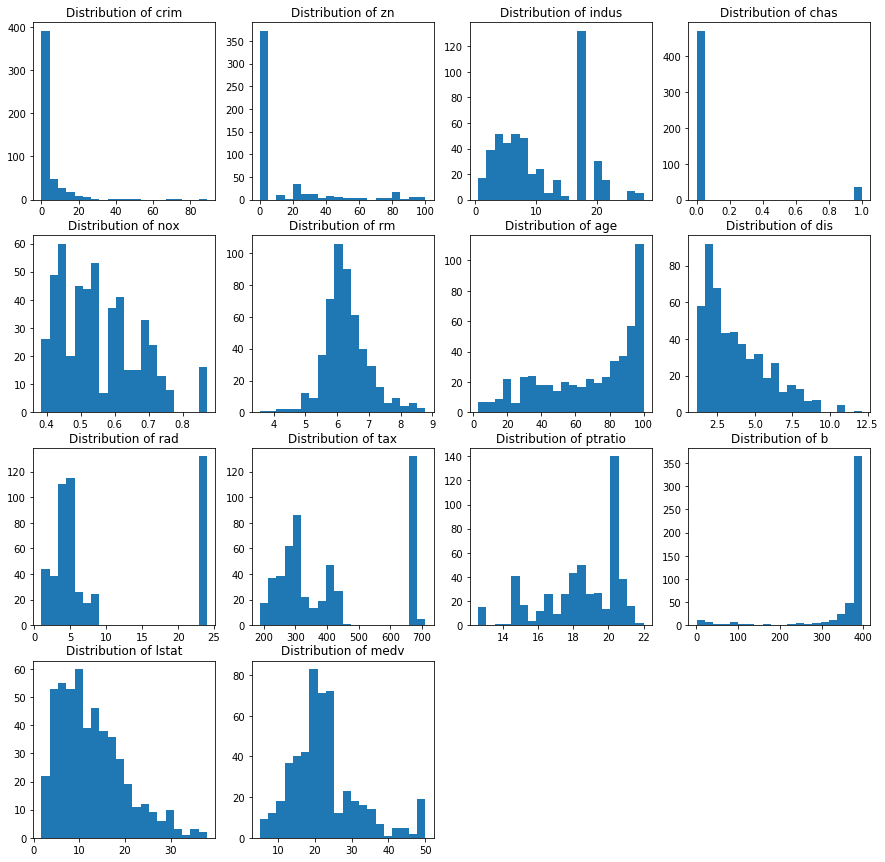

In [17]:
plot_index=1
max_plots=4
for column in boston_df.columns: 
    axes = pyplot.subplot(4, max_plots, plot_index)
    axes.set_title('Distribution of '+ column)
    axes.figure.set_figheight(15)
    axes.figure.set_figwidth(15)
    axes.figure.set_tight_layout(False)
    pyplot.hist(boston_df[column],bins=20)
    plot_index=plot_index+1

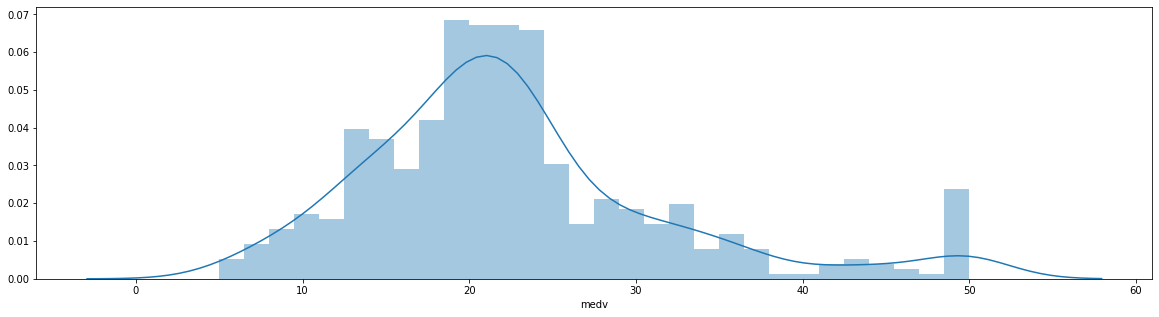

In [25]:
# a feature que vamos prever
%matplotlib inline
pyplot.figure(figsize=(20, 5))
seaborn.distplot(boston_df['medv'], bins=30)

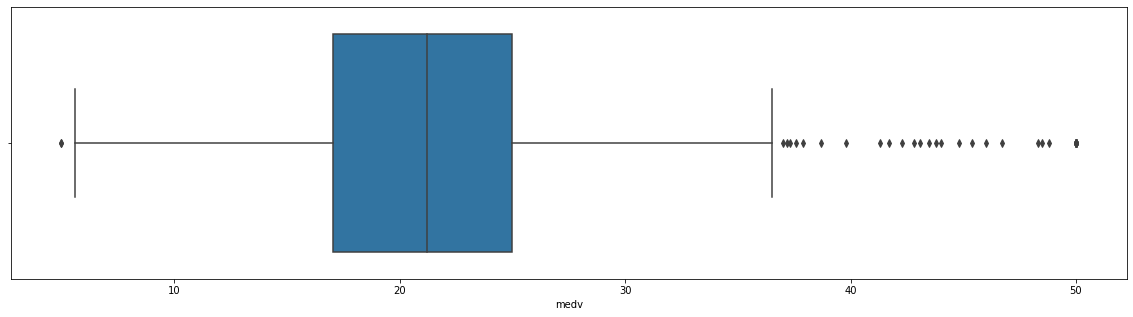

In [27]:
pyplot.figure(figsize=(20, 5))
seaborn.boxplot(boston_df['medv'])

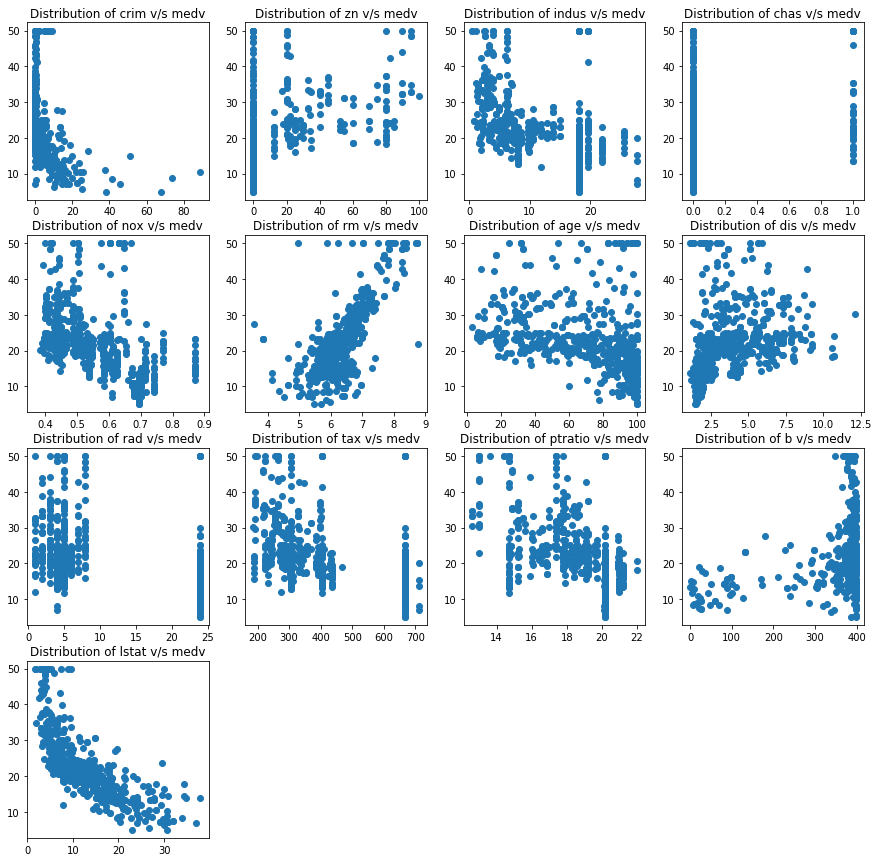

In [31]:
plot_index=1
max_plots=4
for column in boston_df.columns: 
  if column != "medv":
      axes = pyplot.subplot(4, max_plots, plot_index)
      axes.set_title('Distribution of '+ column + " v/s medv")
      axes.figure.set_figheight(15)
      axes.figure.set_figwidth(15)
      axes.figure.set_tight_layout(False)
      pyplot.scatter(boston_df[column], boston_df["medv"], marker='o')
      plot_index=plot_index+1

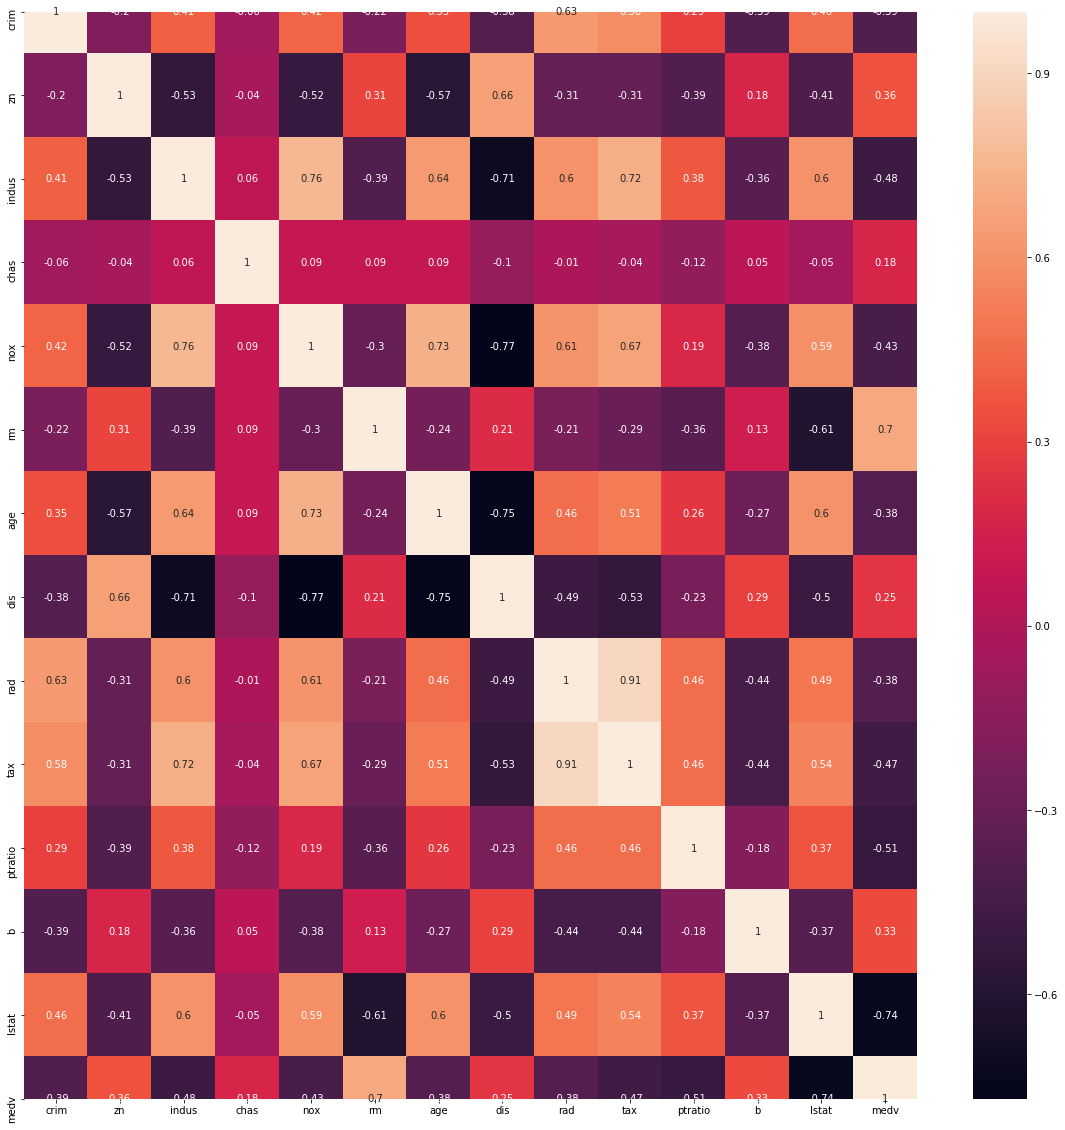

In [21]:
pyplot.figure(figsize=(20, 20))

correlation_matrix = boston_df.corr().round(2)
# annot = True to print the values inside the square
seaborn.heatmap(data=correlation_matrix, annot=True)

## Desenvolvendo nosso algoritmo

Agora que sabemos da relação linear das principais features, vamos desenvolver nosso algoritmo.

![](https://www.explainxkcd.com/wiki/images/9/91/linear_regression.png)

## Testando nosso modelo!

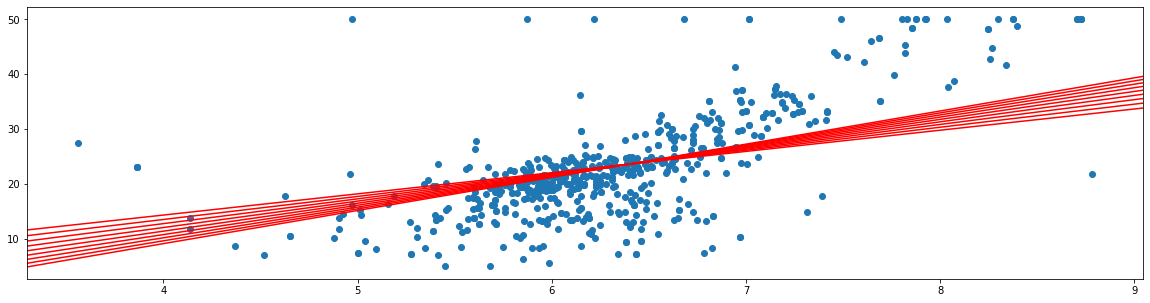

CPU times: user 49.9 s, sys: 190 ms, total: 50.1 s
Wall time: 50.3 s


In [32]:
%%time

import numpy
from linear_regression import linear_regression

X = numpy.array(boston_df["rm"]).reshape(-1,1)
y = numpy.array(boston_df["medv"]).reshape(-1,1)

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y)
model_rm = linear_regression.generate_model(t0, t1)

In [33]:
model_rm(6.575)

array([24.7380265])

In [34]:
linear_regression.cost(t0, t1, X, y)

array([0.45610549])

### CONSEGUIMOS!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTETi2x13qbEzh1fjM79gDk4Y63yLdKTABP-HWPFsuBJIeT_KWy)

In [27]:
from sklearn.linear_model import LinearRegression
model_sk = LinearRegression()

In [28]:
import numpy
model_sk.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
round(model_sk.score(X, y),2)

0.48

In [30]:
model_sk.predict(numpy.array([6.575]).reshape(-1, 1))

array([[25.17574577]])

### Tunando os hyperparameters

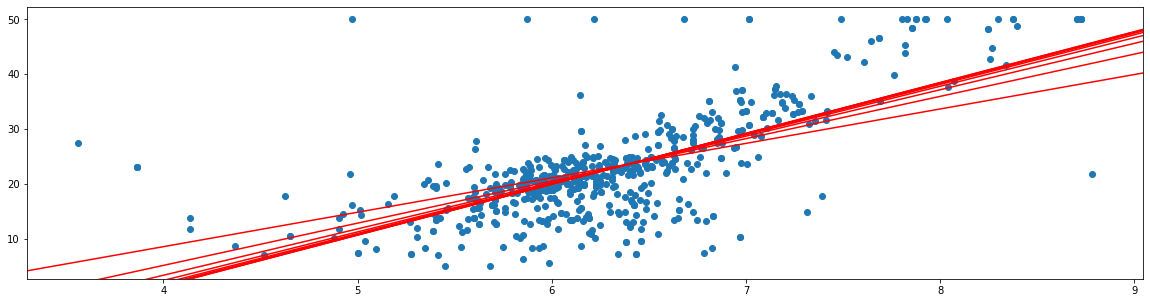

CPU times: user 8min 35s, sys: 1.76 s, total: 8min 37s
Wall time: 8min 39s


array([0.51168974])

In [35]:
%%time

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y, epochs=100000)
linear_regression.cost(t0, t1, X, y)

In [36]:
model_rm = linear_regression.generate_model(t0, t1)
model_rm(6.575)

array([25.29155389])

In [ ]:
%%time

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y, epochs=1000000)
linear_regression.cost(t0, t1, X, y)

In [ ]:
model_rm = linear_regression.generate_model(t0, t1)
model_rm(6.575)

In [ ]:
%%time

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y, epochs=100000, learning_rate=0.01)
linear_regression.cost(t0, t1, X, y)

In [ ]:
model_rm = linear_regression.generate_model(t0, t1)
model_rm(6.575)

In [ ]:
%%time

pyplot.figure(figsize=(20, 5))
t0, t1 = linear_regression.fit(X, y, epochs=100000, learning_rate=0.02)
linear_regression.cost(t0, t1, X, y)

In [ ]:
model_rm = linear_regression.generate_model(t0, t1)
model_rm(6.575)